# Exploratory Data Analysis (EDA)

## Importing Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Pump_Sensor_Data.csv')


## Understanding the Dataset

In [2]:
# Get the first 5 rows of the dataset
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
# Check the shape of the dataset
df.shape

(220320, 55)

In [4]:
# Check the data types of each column
df.dtypes

Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


## Data Cleaning

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:

# Drop columns that contain mostly missing values
df = df.drop(['sensor_15', 'sensor_50', 'sensor_51', 'Unnamed: 0'], axis=1)

# Replace missing values with the median for each column
for col in df.columns[:-1]:
    df[col] = df[col].fillna(df[col].median())

# Check for missing values again
df.isnull().sum()


timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


## Data Visualization

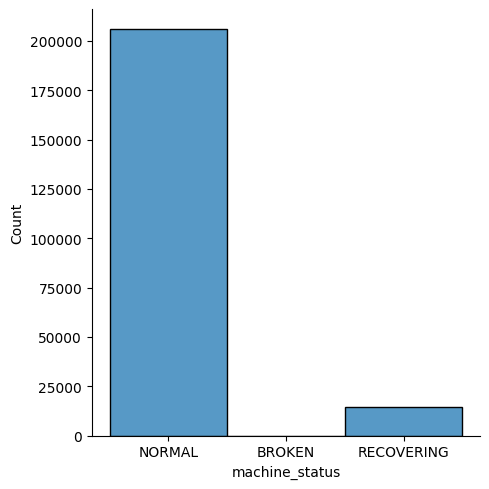

In [8]:
# Plot the distribution of the target variable
sns.displot(df['machine_status'], kde=False)

<AxesSubplot:>

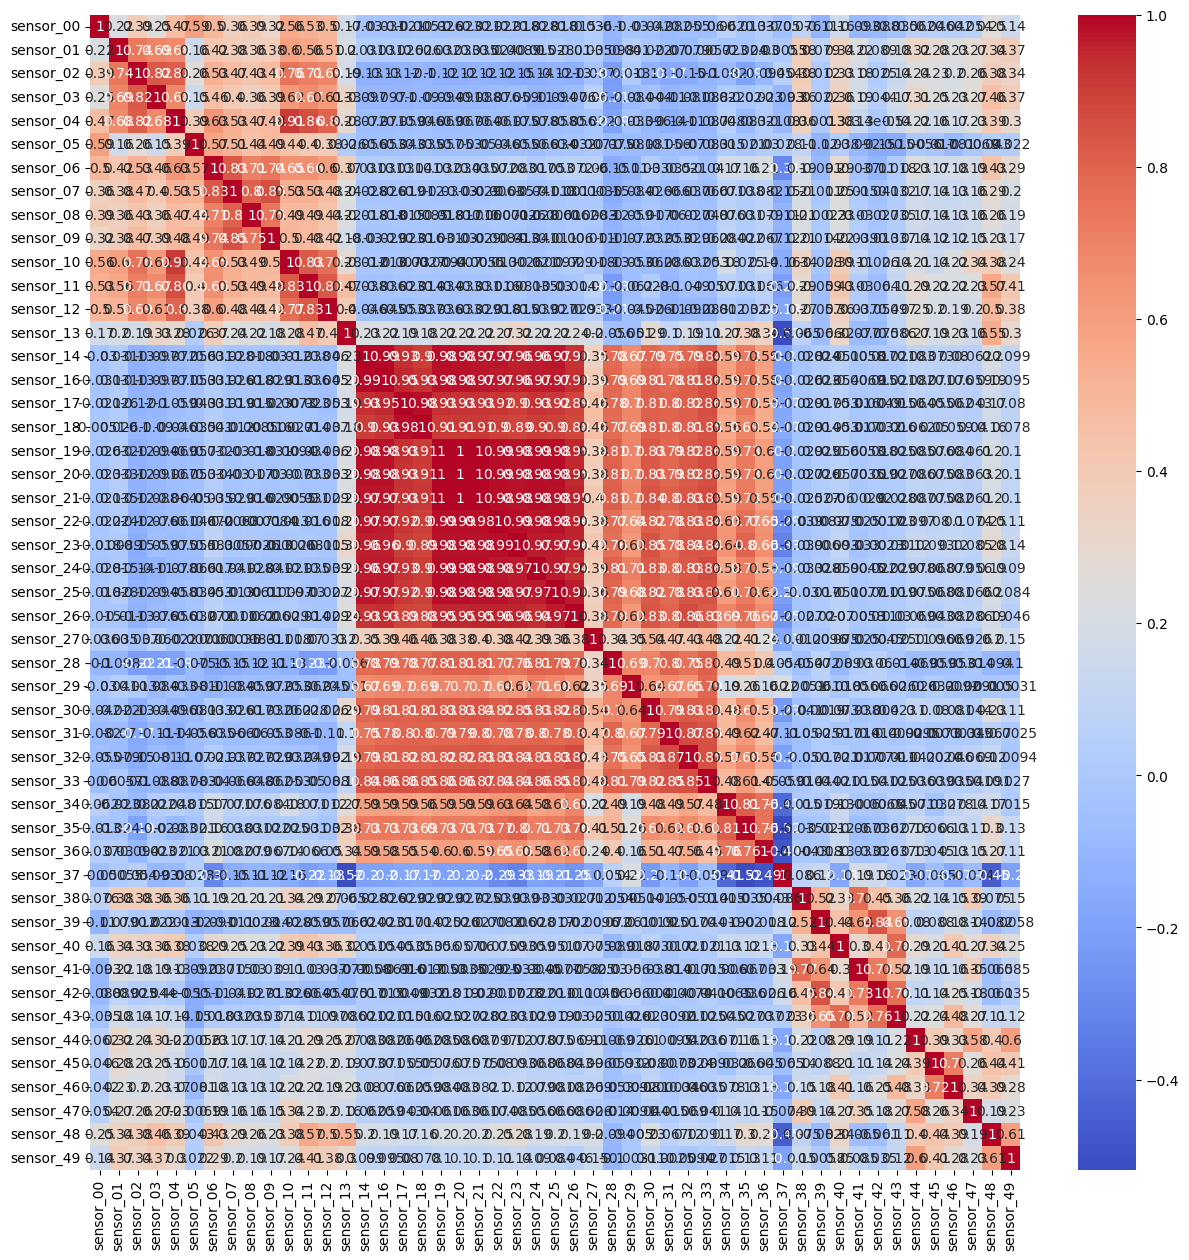

In [9]:
# Plot the correlation matrix
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


We eliminate the features with high corelation to avoid redundunt information.

In [10]:
# df = pd.concat([df.iloc[:, :12], df.iloc[:, 14:16], df.iloc[:, 27:]], axis=1)

In [11]:
target_classes = {"BROKEN": 0, "NORMAL": 1, "RECOVERING": 0}
df['machine_status'] = df['machine_status'].map(target_classes)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,1


In [12]:
df['machine_status'].value_counts()

1    205836
0     14484
Name: machine_status, dtype: int64

## Data Preprocessing

### Scaling the Data

In [13]:
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,1


## Scaling the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

features = df.columns.tolist()[1:-1]

# Scale the data using the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data
df[features] = scaler.fit_transform(df[features])

In [15]:
labels = np.where(df['machine_status'] == 0, 0, 1)

## Splitting the Data into Training and Test Sets

In [36]:
df = df.drop('timestamp', axis=1)

Split the model so that we have all the broken cases in the test set. We do this so our Autoencoder could learn the representaion of our data and can reconstruct it.

In [ ]:
normal_samples = df[df['machine_status'] == 1]  
anomalous_samples = df[df['machine_status'] == 0] 

normal_labels = np.zeros(len(normal_samples))
anomalous_labels = np.ones(len(anomalous_samples))

train_size = int(0.8 * len(normal_samples))
X_train = normal_samples[:train_size]
y_train = normal_labels[:train_size]


X_test_normal = normal_samples[train_size:]
test_anomalous = len(X_test_normal)
X_test_anomalous = anomalous_samples[:test_anomalous]

X_test = pd.concat([X_test_normal, X_test_anomalous])
y_test = np.ones(len(X_test))
y_test[:len(X_test_normal)] = 0


In [ ]:
X_test

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
179152,0.962563,0.854629,0.740038,0.785340,0.796598,0.670193,0.658100,0.687002,0.642474,0.606482,...,0.046936,0.039941,0.047458,0.021384,0.042323,0.054668,0.095288,0.263784,0.080635,1
179153,0.961791,0.854629,0.734345,0.785340,0.803712,0.673320,0.654847,0.687002,0.644259,0.604745,...,0.048240,0.040680,0.048814,0.020196,0.040354,0.055509,0.099476,0.249189,0.082617,1
179154,0.963335,0.854629,0.734345,0.785340,0.808067,0.670385,0.659401,0.685162,0.642474,0.620660,...,0.048240,0.041420,0.050847,0.019602,0.040354,0.058873,0.102618,0.242162,0.085922,1
179155,0.961019,0.854629,0.736243,0.787958,0.795146,0.667343,0.654847,0.688535,0.642474,0.606482,...,0.046284,0.042160,0.051525,0.019602,0.040354,0.066442,0.106806,0.242703,0.088566,1
179156,0.963721,0.853864,0.734345,0.787958,0.799501,0.677822,0.656148,0.688535,0.642474,0.602430,...,0.045632,0.042160,0.051525,0.019899,0.040354,0.072330,0.110995,0.250270,0.091210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69318,0.886144,0.833206,0.855787,0.712042,0.247513,0.661465,0.610605,0.674433,0.621654,0.591724,...,0.028683,0.025888,0.037966,0.009504,0.039370,0.037006,0.065969,0.221081,0.052875,0
77790,0.910845,0.837031,0.800759,0.672775,0.764367,0.673017,0.631750,0.703863,0.654372,0.623842,...,0.480443,0.439349,0.463051,0.040986,0.107283,0.295206,0.458639,0.241081,0.089227,0
128040,0.142802,0.708493,0.527514,0.515707,0.249084,0.000000,0.509109,0.647149,0.623141,0.604745,...,0.005867,0.007396,0.020339,0.002376,0.005906,0.009251,0.007330,0.005405,0.006609,0
141131,0.000772,0.795715,0.863378,0.827225,0.623684,0.014013,0.000651,0.001533,0.000297,0.000289,...,0.036506,0.030325,0.030508,0.011880,0.030512,0.034483,0.058639,0.136757,0.041639,0


# Model

In [ ]:
import numpy as np
import pandas as pd
import wandb
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import Trainer
from pytorch_lightning.loggers.wandb import WandbLogger

In [ ]:
import os


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch import Tensor
from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import pytorch_lightning as pl

In [ ]:
import wandb

run = wandb.init(entity='trajanov', project='anomaly-detection')

In [ ]:
# Initialize a WandbLogger object
wandb_logger = WandbLogger(log_model=True)

In [ ]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [246]:
# Define the dataset class
class SensorDataset(Dataset):
    def __init__(self, data, seq_length, train=True):
        self.sequences = []
        self.labels = []
        if train:
            if 'machine_status' in data.columns.tolist():
                # self.labels = data['machine_status'].values.tolist()
                for i in range(seq_length, len(data)):
                    sequence = data.iloc[i - seq_length:i, :-1].values
                    labels = data.iloc[i - seq_length:i, -1].values
                    if 0 in labels:
                        continue
                    else:
                        self.sequences.append(sequence)
                    
            else:
                for i in range(seq_length, len(data)):
                    sequence = data.iloc[i - seq_length:i, :].values
                    self.sequences.append(sequence)

        else:
            if 'machine_status' in data.columns.tolist():
                # self.labels = data['machine_status'].values.tolist()
                for i in range(seq_length, len(data)):
                    sequence = data.iloc[i - seq_length:i, :-1].values
                    labels = data.iloc[i - seq_length:i, -1].values
                    if 0 not in labels:
                        continue
                    else:
                        self.sequences.append(sequence)
                    
            else:
                for i in range(seq_length, len(data)):
                    sequence = data.iloc[i - seq_length:i, :].values
                    self.sequences.append(sequence)


    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, index):
        sequence = self.sequences[index]
        if self.labels:
            label = self.labels[index]
            return torch.tensor(sequence, dtype=torch.float32), torch.tensor(label, dtype=torch.float32) 
        else:
            return torch.tensor(sequence, dtype=torch.float32)


In [274]:
# Create the datasets and data loaders
seq_length = 60
num_features = 50
train_dataset = SensorDataset(df.iloc[:, 1:-1], seq_length)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


In [275]:
seq_length = 60
# num_features = 50
test_dataset = SensorDataset(df.iloc[:, 1:], seq_length, train=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [276]:
encoder = nn.Sequential(nn.Linear(seq_length * 49, 25), nn.ReLU(), nn.Linear(25, 15))
decoder = nn.Sequential(nn.Linear(15, 25), nn.ReLU(), nn.Linear(25, seq_length * 49))

In [277]:
class LitAutoEncoder(pl.LightningModule):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def training_step(self, batch, batch_idx):
        x = batch
        x = x.view(x.size(0), -1)
        # print(x.shape)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = F.mse_loss(x_hat, x)
        # Include extra logging here
        logs = {'loss': loss}
        return {'loss': loss, 'logs': logs}
    
    def training_epoch_end(self, outputs):
        train_loss = torch.stack([x['logs']['loss'] for x in outputs]).mean()
        logs = {'train_loss': train_loss}
        self.log('train_loss', train_loss)



    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=0.001)
        return optimizer

In [278]:
ae = LitAutoEncoder(encoder, decoder)

In [279]:
rainer = pl.Trainer(max_epochs=10, logger=wandb_logger, gpus=1)
rainer.fit(ae, train_loader)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 6.5 K 
1 | decoder | Sequential | 6.8 K 
---------------------------------------
13.3 K    Trainable params
0         Non-trainable params
13.3 K    Total params


Epoch 9: 100%|██████████| 1722/1722 [00:22<00:00, 76.02it/s, loss=0.0018, v_num=vnrl] 

wandb: WARNING Symlinked 0 file into the W&B run directory, call wandb.save again to sync new files.


1

In [280]:
all_loss = 0
for signal in train_loader:
    encoder = ae.encoder
    encoder.eval()
    decoder.eval()
    signal = signal.view(signal.size(0), -1)
    # print(signal.shape)
    # embed 4 fake images!
    fake_image_batch = signal[0]
    embeddings = encoder(fake_image_batch)
    reconstruct = ae.decoder(embeddings)
    # print(reconstruct.shape)
    loss = F.mse_loss(signal, reconstruct)
    all_loss += loss
threshold = all_loss.item() / len(train_loader)
print(threshold)

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Using a target size (torch.Size([245])) that is different to the input size (torch.Size([128, 245])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  del sys.path[0]


0.05025969980485763


c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Using a target size (torch.Size([245])) that is different to the input size (torch.Size([27, 245])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  del sys.path[0]


In [281]:
# all_loss = 0
anomaly = 0
for signal in test_loader:
    # print(label)
    # print(signal.shape)
    encoder = ae.encoder
    decoder = ae.decoder
    decoder.eval()
    encoder.eval()
    signal = signal.view(signal.size(0), -1)
    fake_image_batch = signal
    embeddings = encoder(fake_image_batch)
    reconstruct = ae.decoder(embeddings)
    loss = F.mse_loss(signal, reconstruct)
    if loss > threshold:
        # print("Anomaly")
        anomaly += 1
        # print(label)
    # all_loss += loss
# threshold = all_loss.item() / len(train_loader)
# print(threshold)
anomaly/len(test_loader)

0.006959757442116869

In [283]:
anomaly

101

In [282]:
len(test_loader)

14512

In [148]:
all_loss.item() / len(train_loader)

0.047037172855360875

## Make prediction if in the next sequences we have a failure

In [18]:
seq_length = 60
seq_length_predict = 60 * 24

### Prepare data

In [19]:
from tqdm import tqdm

processed_data = []
example_nr = 0
while example_nr < len(df) - seq_length_predict:
    found_example_where_pump_worked_in_input_window = False
    i_minute = example_nr
    while not found_example_where_pump_worked_in_input_window:

        start = i_minute
        stop  = start + seq_length
        temp_df = df.iloc[start:stop, -1].values.tolist()
        if 0 not in temp_df:
            found_example_where_pump_worked_in_input_window = True

        else: 
            i_minute += 1

    example_nr = start + 10

    a_single_input_window = df.iloc[i_minute:i_minute+seq_length, :-1].values
    a_single_input_vector = a_single_input_window.flatten()

    start = i_minute+seq_length
    stop  = i_minute+seq_length+seq_length_predict
    temp_df = df.iloc[start:stop, -1].values.tolist()
    if 0 not in temp_df:
        output_value = 0

    else: 
        output_value = 1
    processed_data.append( (a_single_input_vector, output_value) )
    
    

In [20]:
len(processed_data)

20402

## Prepare a large example data matrix D from the list of training pairs

In [21]:
anomaly = [i for i, data in enumerate(processed_data) if data[1] == 1]
normal = [i for i, data in enumerate(processed_data) if data[1] == 0]

In [22]:
len(anomaly)

1008

In [38]:
train_anomaly = int(len(anomaly) * 0.8)
anomaly_samples = [processed_data[i][0] for i in anomaly[:train_anomaly]]
anomaly_labels = [processed_data[i][1] for i in anomaly[:train_anomaly]]
normal_samples = [processed_data[i][0] for i in normal[:train_anomaly]]
normal_labels = [processed_data[i][1] for i in normal[:train_anomaly]]
x_train = anomaly_samples + normal_samples
y_train = anomaly_labels + normal_labels

In [39]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [40]:
x_train.shape

(1612, 2940)

In [41]:
x_train_df = pd.DataFrame(x_train)

In [82]:
test_anomaly = int(len(anomaly) * 0.2)
anomaly_samples = [processed_data[i][0] for i in anomaly[train_anomaly: train_anomaly+test_anomaly]]
normal_samples = [processed_data[i][0] for i in normal[train_anomaly: train_anomaly+test_anomaly+500]]
x_test = anomaly_samples + normal_samples
y_test = [1.0] * len(anomaly_samples) + [0.0] * len(normal_samples)

In [59]:
(x_train_df == x_test[0]).all(1).any()

False

In [83]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [62]:
import tensorflow
tensorflow.__version__

'2.9.1'

In [64]:
input_vec_len = processed_data[0][0].shape[0]
output_vec_len = 1

In [65]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(input_vec_len,)) )
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.build()

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               588200    
                                                                 
 dense_1 (Dense)             (None, 40)                8040      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 596,281
Trainable params: 596,281
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(x_train, y_train, epochs=150)

Epoch 1/150
51/51 [==============================] - 1s 3ms/step - loss: 0.9816 - accuracy: 0.5701
Epoch 2/150
51/51 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.6346
Epoch 3/150
51/51 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.7091
Epoch 4/150
51/51 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.7643
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.7922
Epoch 6/150
51/51 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.8586
Epoch 7/150
51/51 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9057
Epoch 8/150
51/51 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9225
Epoch 9/150
51/51 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.8871
Epoch 10/150
51/51 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9646
Epoch 11/

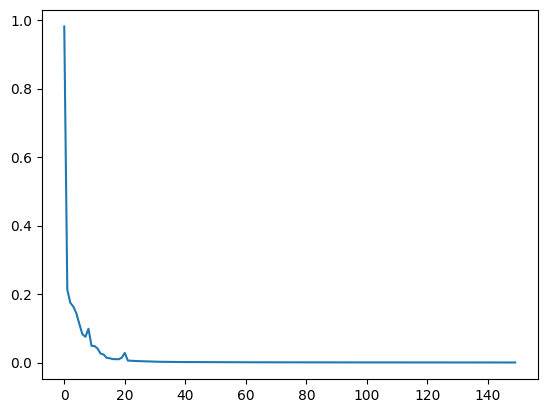

In [68]:
plt.plot(history.history["loss"])
plt.show()

In [84]:
preds = model.predict(x_test)

29/29 [==============================] - 0s 950us/step


In [85]:
preds = preds.flatten()

In [86]:
preds_true = [1 if pr > 0.5 else 0 for pr in preds]

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds_true)

array([[546, 155],
       [  0, 201]], dtype=int64)

In [73]:
preds.shape

(1402,)

In [74]:
y_test.shape

(1402,)

In [75]:
preds = preds.flatten()

In [76]:
preds.shape

(1402,)

In [77]:
preds[:20]

array([0.98456275, 0.99939525, 0.98938894, 0.979738  , 0.9951322 ,
       0.9944792 , 0.9815594 , 0.9848566 , 1.0000328 , 0.99742985,
       0.9862007 , 0.9826647 , 0.9920342 , 1.0148191 , 1.0150363 ,
       1.0100067 , 1.0245243 , 1.0384169 , 1.0351905 , 1.0310273 ],
      dtype=float32)

In [78]:
min(preds)

-0.03521946

In [79]:
max(preds)

1.108688

In [88]:
pump_failure_in_future_window = 0
correctly_predicted_pump_failures = 0
correctly_predicted = 0
nr_test_samples = preds.shape[0]

tp = 0
tn = 0
fp = 0
fn = 0

for test_nr in range(0,nr_test_samples):
    ground_truth_output = y_test[test_nr]
    if preds[test_nr] < 0.5:
        predicted_output = 0.0
    else:
        predicted_output = 1.0
    print("Test example #{0}: ground truth vs. predicted machine status: {1} vs. {2}"
          .format(test_nr, ground_truth_output, predicted_output ))
    
    if predicted_output == ground_truth_output:
        correctly_predicted +=1
        
    if ground_truth_output==1:
        pump_failure_in_future_window += 1
        if predicted_output == ground_truth_output:
            correctly_predicted_pump_failures +=1
            
    if ground_truth_output==1:
        if predicted_output == ground_truth_output:
            # True positive:
            # There was a pump failure
            # and the MLP predictor predicted it
            tp+=1
        else:
            # False negative:
            # There was a pump failure
            # BUT the MLP predictor predicted it not
            fn+=1
            
    if ground_truth_output==0:        
        if predicted_output == ground_truth_output:
            # True negative:
            # There was no pump failure
            # and the MLP predictor predicted no pump failure
            tn+=1
        else:
            # False positive:
            # There was no pump failure
            # BUT the MLP predictor predicted a pump failure
            fp+=1
            
        
correct_classification_percent = (correctly_predicted/nr_test_samples)*100.0
print("\nCorrectly predicted {0} of {1} test examples --> {2}%"
      .format(correctly_predicted, nr_test_samples, correct_classification_percent))

print("\nIf there was really a pump failure in the future window,\n"
      "the MLP could predict it in {0} of the {1} pump failure (in future window) example cases."
      .format(correctly_predicted_pump_failures, pump_failure_in_future_window))

print("True positive:", tp)
print("True negative:", tn)
print("False positive:", fp)
print("False negative:", fn)

Test example #0: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #1: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #2: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #3: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #4: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #5: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #6: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #7: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #8: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #9: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #10: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #11: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #12: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #13: ground truth vs. predicted machine status: 

In [ ]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {0:.2f}".format(precision))
print("Recall   : {0:.2f}".format(recall))